In [3]:
!pip install keras


In [5]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense

from tensorflow.keras.utils import to_categorical

from keras.preprocessing import image

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_test.shape

(10000, 28, 28)

In [9]:
y_train.shape

(60000,)

In [10]:
y_test.shape

(10000,)

In [11]:
def plot_img(img):
  plt.imshow(img.reshape(28,28), cmap="gray")

Image is :  1


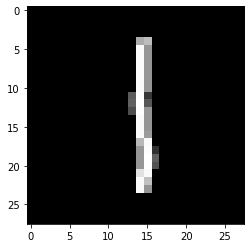

In [12]:
plot_img(x_train[1002])
print("Image is : " , y_train[1002])

# Model Building

In [14]:
x_train.shape

(60000, 28, 28)

In [15]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [16]:
x_train.shape

(60000, 784)

In [17]:
x_test.shape

(10000, 784)

In [18]:
model = Sequential()
model.add( Dense(units=32, activation='relu', input_shape = (784,))  ) # input_shape only for first layer
model.add( Dense(units=64, activation='relu' ))
model.add( Dense(units=128, activation = 'relu'))
model.add( Dense(units=256, activation = 'relu'))
model.add( Dense(units=64, activation = 'relu'))
model.add( Dense(units=10, activation='softmax')) # final  softmax = > probabilities

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 85,674
Trainable params: 85,674
Non-trainable params: 0
____________________________________________________

In [20]:
# "adam"/"sgd"/"rmsprop"
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [21]:
y_train.shape

(60000,)

In [22]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [23]:
y_train.shape

(60000, 10)

In [24]:
y_test.shape

(10000, 10)

In [25]:
hist = model.fit(x=x_train, y= y_train, batch_size=32,epochs = 10, validation_data=(x_test, y_test) )

Epoch 1/10
1875/1875 [==============================] - 19s 3ms/step - loss: 1.1183 - accuracy: 0.7452 - val_loss: 0.2572 - val_accuracy: 0.9262
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2429 - accuracy: 0.9307 - val_loss: 0.1925 - val_accuracy: 0.9461
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1857 - accuracy: 0.9467 - val_loss: 0.1869 - val_accuracy: 0.9466
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1641 - accuracy: 0.9521 - val_loss: 0.1678 - val_accuracy: 0.9526
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1456 - accuracy: 0.9579 - val_loss: 0.1585 - val_accuracy: 0.9546
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1337 - accuracy: 0.9608 - val_loss: 0.1560 - val_accuracy: 0.9569
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1206 - accuracy: 0.9652 - val_loss: 0.1554 - val_accuracy

In [26]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1319 - accuracy: 0.9641


[0.1318933069705963, 0.9641000032424927]

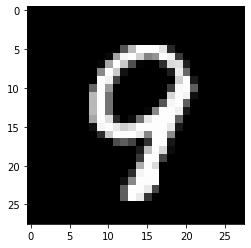

In [27]:
plot_img(x_test[5001])

In [28]:
y_pred = model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [29]:
y_pred[5001]

9

In [30]:
model.predict_classes(x_test[[5001]])

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9])

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [47]:
# this code is custom image. 

img = image.load_img("/content/drive/MyDrive/download.png", grayscale=True, target_size=(28,28))
img = np.array(img)
img = img.reshape(1, 784)

prediction = model.predict_classes(img)
print("prediction : ",end=" ")
print(prediction)

prediction :  [7]


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
